In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train_data_restaurant.tsv', names=['text', 'sentiment'], sep='\t')
test = pd.read_csv('data/test_data_restaurant.tsv', names=['text', 'sentiment'], sep='\t')

# Train Test Data Information

In [3]:
train.head()

text sentiment
0  Saya makan di sini dengan menggunakan voucher ...  negative
1  Mas indosat buat main game enemy has been slai...  negative
2  Trus sy percuma dong update no hp terbaru ke c...  negative
3  jika kita pilih dia maka akan ada lebih dari 3...  negative
4  Dikarenakan adik saya suka dengan restoran ini...  negative

In [4]:
train.shape

(1780, 2)

In [5]:
train['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1780 non-null   object
 1   sentiment  1780 non-null   object
dtypes: object(2)
memory usage: 27.9+ KB


In [7]:
test.head()

text sentiment
0  Tempatnya sih menarik, mudah dijangkau dari se...  negative
1  lokasi strategis penasaran karena daerah situ ...  negative
2  Sesuai namanya, restoran ini unik dalam menyaj...  negative
3  Saya datang ketika petang dan hujan deras temp...  negative
4  Kalao mau ke sana jangan pas malem sih, soalny...  negative

In [8]:
test.shape

(185, 2)

In [9]:
test['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       185 non-null    object
 1   sentiment  185 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


# Distribution

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

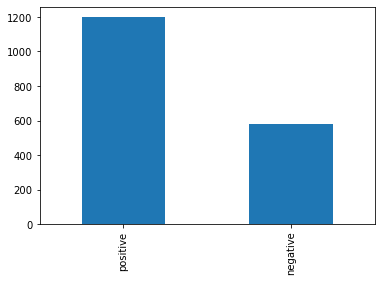

In [12]:
train['sentiment'].value_counts().plot(kind='bar')

data is imbalance

In [13]:
train['sentiment'].value_counts()

positive    1200
negative     580
Name: sentiment, dtype: int64

In [14]:
train['sentiment'].value_counts()['positive']/train['sentiment'].value_counts()['negative']

2.0689655172413794

In [15]:
import math

In [16]:
print('ratio negative:positive is approx. {}:{}'
      .format(1, math.floor(train['sentiment'].value_counts()['positive']/train['sentiment'].value_counts()['negative'])))

ratio negative:positive is approx. 1:2


# Duplicate Data

In [17]:
temp = train.copy()

In [18]:
beforeDrop = len(temp)
print(beforeDrop)

1780


In [19]:
temp.drop_duplicates(subset=['text', 'sentiment'], keep='first', inplace=True)

In [20]:
temp.shape

(1780, 2)

In [21]:
print("Banyaknya data duplicate:", beforeDrop - len(temp))

Banyaknya data duplicate: 0


# Inconsistent Data

In [22]:
temp.shape

(1780, 2)

In [23]:
beforeDrop = len(temp)
print(beforeDrop)

1780


In [24]:
temp.drop_duplicates(subset=['text'], keep=False, inplace=True)

In [25]:
temp.shape

(1780, 2)

In [26]:
print("Banyaknya data inkonsisten (subset content, candidate):", beforeDrop - len(temp))

Banyaknya data inkonsisten (subset content, candidate): 0


tidak ada data duplikat dan inkonsisten

# Text Length

In [27]:
train['text_len'] = train['text'].apply(len)

Text(0.5, 0, 'Text Length')

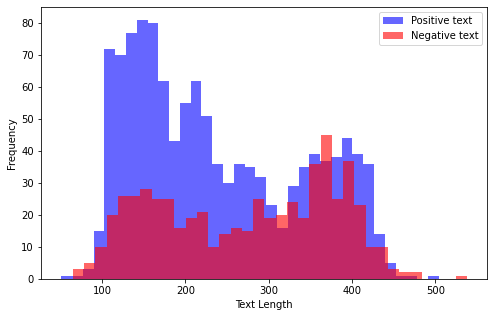

In [28]:
plt.figure(figsize=(8, 5))
train[train['sentiment']=='positive']['text_len'].plot(bins=35, kind='hist', color='blue',
                                       label='Positive text', alpha=0.6)
train[train['sentiment']=='negative']['text_len'].plot(bins=35, kind='hist', color='red', 
                                       label='Negative text', alpha=0.6)
      
plt.legend()
plt.xlabel("Text Length")

In [29]:
train.groupby('sentiment').mean()

text_len
sentiment            
negative   273.253448
positive   238.435000

In [30]:
train = train.drop(columns=['text_len'])

# Contain URL, emoji, emoticon, hastag, mention, bahasa inggris / daerah

### containing url

In [31]:
import re

In [32]:
url_pattern = r'(.*)((http*)|(www*))'
total = 0
for index, row in train.iterrows():
    if re.match(url_pattern, row['text']):
        total += 1
        print('index {}: {}'.format(index, row['text']))
# print('contain url:', total, 'out of', train.shape[0], 'data')

index 110: makanan kamseupay ewwww banget tahu gk cih makanannya ada cicak, pur burung, jangkrik teru paling gila toilet kagak pernah di bersihkan meja bawahnya ada permen karet meja sampai ber jamur idih ewww


tidak ada url

### containing emoji + smiley

In [33]:
def find_emoji(text):
    line = re.findall(r'\:(.*?)\:', text)
    return line

In [34]:
import json

In [35]:
# source: https://en.wikipedia.org/wiki/List_of_emoticons and translated by myself
# json.dump(dict_smiley, open('dict_smiley_indonesia.json', 'w'))
smiley_dict = json.load(open('dict_smiley_indonesia.json', 'r'))

In [36]:
import emoji

In [37]:
# returning the emoji +smiley that has been found
def get_emoji_smiley(text, smiley_dict=smiley_dict):
    words = text.lower().split()
    #  convert emoticon
    smiley = []
    for word in words:
        if word in smiley_dict:
            smiley.append(word)
    words = [smiley_dict[word] if word in smiley_dict else word for word in words]
    words = ' '.join(words)
    #  convert emoji
    words = emoji.demojize(words)
    return smiley + find_emoji(words)

In [38]:
train['emoji'] = train['text'].apply(lambda x: get_emoji_smiley(x))

In [39]:
for index, row in train.iterrows():
    if row['emoji'] != []:
        print(index, row['emoji'])

23 [':(']
68 [' - atmosfir dengan kursi dan meja dengan kayu berkualitas negatif']
85 [':(']
118 [':(']
119 [':(']
133 [' lumayan tematik sesuai judul ruangan ', ' western n local standart coffee ']
254 [':(']
288 [':p']
303 [':(']
445 [':(']
457 [' - rasa makanan enak, paket nasi liwet terutama - penyajian lumayan cepat minus']
483 [':(']
698 [':p']
704 [':p']
728 [':)']
732 [':)']
765 [':)', ' - bakmi spesial ', ' gurih - tea manis ']
810 [' tipikal cafe di jakarta dengan dominan kayu. oke untuk tempat nongkrong. makanan']
829 [':)']
841 [':)']
875 [':)']
917 [':)']
924 [':)']
935 [':)']
969 [' dimasak setengah matang dengan kuning yang merekah ketika berpadu dengan nasi anget 2. jengkol balado ']
986 [':)']
1052 ['d tapi teh tawarnya juara, hanya beberapa ratus rupiah dan bisa diisi ulang ']
1141 [':)']
1161 [':)']
1182 [':)']
1300 [':)']
1360 [':)']
1383 [':)']
1404 [':)']
1423 [' tempat nongkrong nyaman, ada smoking area, menu makanan bermacam, harganya pun sesuai. wajib dicoba ']

text mengandung smiley

In [40]:
train = train.drop(columns=['emoji'])

### containing hashtag / mention

In [41]:
mention_pattern = r'(.*)(@[A-Za-z0-9]+)'
total = 0
for index, row in train.iterrows():
    if re.match(mention_pattern, row['text']):
        total += 1
        print('index {}: {}'.format(index, row['text']))
# print('contain url:', total, 'out of', train.shape[0], 'data')

In [42]:
hashtag_pattern = r'(.*)(#[A-Za-z0-9]+)'
total = 0
for index, row in train.iterrows():
    if re.match(hashtag_pattern, row['text']):
        total += 1
        print('index {}: {}'.format(index, row['text']))
# print('contain url:', total, 'out of', train.shape[0], 'data')

index 791: Tempat nongkrong yg bergaya vintage yg asik bngett kopinya yg khas and asli pisan diolah dengan alat2 jadul ,edan edun pisan Next day or weekend i come again to . #bdgpisan #bdgtea


tidak ada mention tapi ada hashtag di data train

### containing bahasa inggris / daerah

In [43]:
for index, row in train.iterrows():
    print(index, row['text'])

0 Saya makan di sini dengan menggunakan voucher disdus. Paket nasi ayam kari, dengan diskon hingga 30 persen. Akibatnya para pengunjung mengantri untuk meredeem voucher. Cilakanya cek voucher masih dilakukan secara manual. Tidak ada masalah untuk makanannya, hanya saja antrian terlalu lama. Voucher sendiri sudah dibeli jadi mau tidak mau para pengunjung mengantri
1 Mas indosat buat main game enemy has been slain susah bener mas tolong sinyalnya diperbaiki mas soalnya lelet nggak lelet kuotanya kesedot terus..
2 Trus sy percuma dong update no hp terbaru ke cs cab bni kalo data di bni masih no hp lama, gimana sih pelayanannya!
3 jika kita pilih dia maka akan ada lebih dari 300 kampung itu akan digusur.
4 Dikarenakan adik saya suka dengan restoran ini, saya akhirnya mampir ke sini. Dari awal sih saya langsung tidak sreg sih. Makanan yang disediakan terlihat seperti yang tidak terlalu membangkitkan selera. Berbeda dengan restoran shabu yang biasa saya kunjungi. Dan setelah saya memilih dan

550 Banyak cafe di dago atas yg sdh di datangi, kali ini mencoba Cafe Lawangwangi, dulu cuma galery krn saya sering datang untuk melihat pameran seni. Tempat cukup ok, tp msh byk tempat di dago atas yg jauh lbh ok dari ini. Kami pesan steak grill chicken dan chicken schnitzel, kurang enak dan hambar.
551 Lokasi sangat sejuk dan hommy. Pemandangan indah. Banyak pameran2 seni dan kreatif disana. Banyak hasil karya seni dipajang di sana. Namun makanan tidak terlalu enak
552 Cukup menarik untuk berfoto sejenak baik sendiri maupun dengan kawan ataupun keluarga, cukup singgah singkat dan nothing special
553 chinese food legendaris uda lama banget nih chinese food satu ini semua nya enak yang ga enak cuma parkirnya aja aujubila susahnya parkir harus di seberang karena depan resto trotoar. jadi harus sabar banget-banget. sedih deh.
554 Datang kesini sehari sebelum imlek jadi pilihan menunya terbatas. Gurame asam manisnya sudah dingin. Mengecewakan.
555 pagi pagi sarapan di sini lama banget mak

1050 aku suka goreng ikanya yang sangat lezat. semoga saya lain waktu ke sana lagi
1051 semua makanan dsini enak dah dan bener2 ga bikin kantong bolong nasi cuma 1.000 boleh nambah sepuasnya menu mulai 4rebuan murah banget dah minum teh tawar cuma 100 perak bisa refill pula mantabbbb
1052 Paket murah memang disertai dengan porsi yang sedikit :D tapi teh tawarnya juara, hanya beberapa ratus rupiah dan bisa diisi ulang :D
1053 makanan lengkap dengan resto yang representatif. harga murah dengan diskon menurut umur.
1054 Baru pertama kali ini kami masuk ketempat ini, karena pengen mencicipi pasta dan pizza nya. karena keponakan paling suka dengan pizza dan pasta. rasa nya sih biasa saja sama seperti yang lain nya. dan masih banyak lagi menu pilihan lain nya seperti tahugejrot, lomie dan pem'pek.
1055 Perhatian, vienna yang dulu telah berubah. Saat ini menjadi pujasera yang menajajani aneka makanan dari pempek, lomie, hingga tahu gejrot. Saya pesan sate, dan satenya kurang enak.
1056 Makan 

1578 Tempat makan masakan sunda tempo dulu, menu sederhana, kesini paling favorit semur jengkol, untuk harga memang agak pricey, apalagi menu sambel yg harus bayar. jika Anda mengejar rasa masakan sunda yg autentik, Ma Uneh patut dipertimbangkan. makanan disini selalu dihangatkan (digoreng ulang) sebelum disajikan.
1579 Nah, ini dia. tempat makan yang tidak membuat ketagihan. Meskipun sudah ada warung Mak Uneh berkonsep restoran di Jl. Setiabudhi. Warung yang asli di Jl. Pajajaran ini tetap menggoda. Berada di dalam gang yang sempit, tapi suasana dalamnya bersih, menarik, berkonsep Sunda, serta lengkap dengan mushollanya. Makannya, jangan ditanya, beraneka makanan sunda dengan sambal beraneka jenis tersedia di sana.
1580 Warung Mak uneh yang ada di dalam gang terasana 132 nampak bersih, enak dan pelayananan yang cepat. Untuk masuk kemari mobil harus parkir didepan RS Melinda atau gang disebelah RS Melinda, jln Pajajaran. Setelah itu jalan kaki sekitar 50 M kerah dalam. Warung ini buka 

#### mengandung bahasa inggris

In [44]:
train.iloc[1]['text']

'Mas indosat buat main game enemy has been slain susah bener mas tolong sinyalnya diperbaiki mas soalnya lelet nggak lelet kuotanya kesedot terus..'

In [45]:
train.iloc[791]['text']

'Tempat nongkrong yg bergaya vintage yg asik bngett kopinya yg khas and asli pisan diolah dengan alat2 jadul ,edan edun pisan Next day or weekend i come again to . #bdgpisan #bdgtea'

#### mengandung bahasa daerah (eg. euy, pisan - sunda)

In [46]:
train.iloc[791]['text']

'Tempat nongkrong yg bergaya vintage yg asik bngett kopinya yg khas and asli pisan diolah dengan alat2 jadul ,edan edun pisan Next day or weekend i come again to . #bdgpisan #bdgtea'

In [47]:
train.iloc[1404]['text']

'Kupat Tahu Gempol merupakan salah satu kupat tahu legendaris di Kota Bandung. Tempatnya tidak terlalu besar tetapi cukup mencolok dengan warna merahnya di pertigaan Pasar Gempol. Porsinya pas banget untuk brunch. Ciri khas dari kupat tahu ini adalah tahunya yang lembut dan kenyal serta kuah kacangnya pas di lidah, dipadu dengan lontong, tauge dan kerupuk merah. Enak euy :)'

# Preprocess

In [48]:
train.head()

text sentiment
0  Saya makan di sini dengan menggunakan voucher ...  negative
1  Mas indosat buat main game enemy has been slai...  negative
2  Trus sy percuma dong update no hp terbaru ke c...  negative
3  jika kita pilih dia maka akan ada lebih dari 3...  negative
4  Dikarenakan adik saya suka dengan restoran ini...  negative

In [49]:
train = train.reset_index(drop=True)

In [50]:
train.head()

text sentiment
0  Saya makan di sini dengan menggunakan voucher ...  negative
1  Mas indosat buat main game enemy has been slai...  negative
2  Trus sy percuma dong update no hp terbaru ke c...  negative
3  jika kita pilih dia maka akan ada lebih dari 3...  negative
4  Dikarenakan adik saya suka dengan restoran ini...  negative

### Cleaning Data

In [51]:
from nltk.corpus import stopwords

In [52]:
# This function converts a text to a sequence of words.
# return clean text
def clean_text(text, smiley_dict=smiley_dict, remove_stopwords=False):
    # 1. removing mention & hastag:
    # @[A-Za-z0-9]+ represents mentions
    # #[A-Za-z0-9]+ represents hashtags
    cleaned_text = re.sub(r"(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", "", text)
    # 2. removing url
    cleaned_text = re.sub("(\w+:\/\/\S+)", " ", cleaned_text)
    # 3. Converting to lower case and splitting
    words = cleaned_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("indonesian"))
        stops2 = set(stopwords.words("english"))
        words = [w for w in words if not w in stops and not w in stops2]
    # 5. convert emoticon
    words = [smiley_dict[word] if word in smiley_dict else word for word in words]
    words = ' '.join(words)
    # 6. convert emoji
    words = emoji.demojize(words)
    # 7. Removing non-letter. (dilakukan setelah converting emoticon & emoji
    # karena kedua langkah tersebut masih membutuhkan simbol)
    words = re.sub("[^a-zA-Z]"," ", words)
    words = ' '.join(words.split())
    
    return words

In [53]:
train['cleaned_text'] = train['text'].apply(clean_text)

In [54]:
# check cleaning data

In [55]:
url_pattern = r'(.*)((http*)|(www*))'
total = 0
for index, row in train.iterrows():
    if re.match(url_pattern, row['cleaned_text']):
        total += 1
        print('index {}: {}'.format(index, row['cleaned_text']))
print('contain url:', total, 'out of', train.shape[0], 'data')

index 110: makanan kamseupay ewwww banget tahu gk cih makanannya ada cicak pur burung jangkrik teru paling gila toilet kagak pernah di bersihkan meja bawahnya ada permen karet meja sampai ber jamur idih ewww
contain url: 1 out of 1780 data


In [56]:
train.iloc[791]['cleaned_text']

'tempat nongkrong yg bergaya vintage yg asik bngett kopinya yg khas and asli pisan diolah dengan alat jadul edan edun pisan next day or weekend i come again to'

### Spelling Correction & Fixing Slang Word

In [57]:
# source: https://github.com/ramaprakoso/analisis-sentimen/blob/master/kamus/kbba.txt and I added some maps
# eg. cwek, cewek, ak, mmg, dri, gw, lo
kbba_dict = json.load(open('dict_kbba.json', 'r'))

In [58]:
def fixing_spell_slangword(text, kbba_dict=kbba_dict, remove_stopwords=False):
    words = text.split()
    
    words = [kbba_dict[word] if word in kbba_dict else word for word in words]
    
    if remove_stopwords:
        stops = set(stopwords.words("indonesian"))     
        words = [w for w in words if not w in stops]    
        
    words = ' '.join(words)
    words = re.sub("[^a-zA-Z]"," ", words)
    
    return words

In [59]:
train['cleaned_text'] = train['cleaned_text'].apply(fixing_spell_slangword)

In [60]:
train[['text', 'cleaned_text']].head()

text  \
0  Saya makan di sini dengan menggunakan voucher ...   
1  Mas indosat buat main game enemy has been slai...   
2  Trus sy percuma dong update no hp terbaru ke c...   
3  jika kita pilih dia maka akan ada lebih dari 3...   
4  Dikarenakan adik saya suka dengan restoran ini...   

                                        cleaned_text  
0  saya makan di sini dengan menggunakan voucher ...  
1  mas indosat buat main game enemy has been slai...  
2  terus saya percuma dong update nomor hp terbar...  
3  jika kita pilih dia maka akan ada lebih dari k...  
4  dikarenakan adik saya suka dengan restoran ini...

In [61]:
print(train.loc[380]['text'])
print('=====================')
print(train.loc[380]['cleaned_text'])

Tempat oke, rasa makanan oke. Untuk kumpul dengan teman sangat oke kerena di Bandung utara dengan udara yang sejuk. Yang mengganggu adalah perilaku koki di dapur yang kebetulan terlihat dari tempat duduk kami. saat menyiapkan makanan dia berulang kali mencicipi dengan jari !! sangat tidak higienis dan tidak pantas untuk kelas restoran seperti ini. manajemen harus memperhatikan higiene kebersihan dapur.
tempat oke rasa makanan oke untuk kumpul dengan teman sangat oke kerena di bandung utara dengan udara yang sejuk yang mengganggu adalah perilaku koki di dapur yang kebetulan terlihat dari tempat duduk kami saat menyiapkan makanan dia berulang kali mencicipi dengan jari sangat tidak higienis dan tidak pantas untuk kelas restoran seperti ini manajemen harus memperhatikan higiene kebersihan dapur


In [62]:
train.shape

(1780, 3)

### convert label as numeric type

In [63]:
train['sentiment']

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
1775    positive
1776    positive
1777    positive
1778    positive
1779    positive
Name: sentiment, Length: 1780, dtype: object

In [64]:
sentiment_to_id = {'positive': 1, 'negative': 0}
id_to_sentiment = {1: 'positive', 0: 'negative'}

In [65]:
train['sentiment'] = train['sentiment'].map(sentiment_to_id)

In [66]:
train['sentiment']

0       0
1       0
2       0
3       0
4       0
       ..
1775    1
1776    1
1777    1
1778    1
1779    1
Name: sentiment, Length: 1780, dtype: int64

# WordCloud

In [67]:
def remove_stopwords(text, stopwords_indonesia=True, stopwords_english=False):
    words = text.lower().split()
    
    if stopwords_indonesia:
        stops = set(stopwords.words("indonesian"))
        words = [w for w in words if not w in stops]
    if stopwords_english:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    words = ' '.join(words)

    return words

In [68]:
temp = pd.DataFrame()
temp['sentiment'] = train['sentiment']
temp['text'] = train['cleaned_text'].apply(remove_stopwords)

In [69]:
temp

sentiment                                               text
0             0  makan voucher disdus paket nasi ayam kari disk...
1             0  mas indosat main game enemy has been slain sus...
2             0  update nomor hp terbaru cs cab bni data bni no...
3             0                              pilih kampung digusur
4             0  adik suka restoran mampir sih langsung sreg si...
...         ...                                                ...
1775          1  suka minuman merah meriah enak manis pas beran...
1776          1  suasana damai resto ramai sambut rima sambut d...
1777          1  restoran terletak kawasan intercontinental hot...
1778          1  pilihan kaya baso ny banyakk sinii unik suki b...
1779          1  menu utama suki bedanya resto suki membeli bas...

[1780 rows x 2 columns]

In [70]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Positive Sentiment')

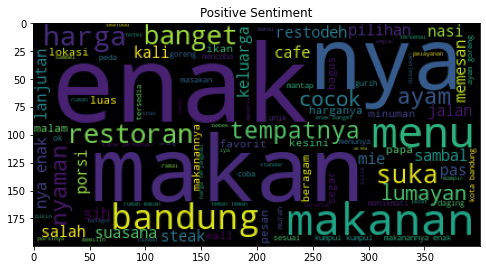

In [71]:
f = plt.figure(figsize=(8,12))
wordcloud = WordCloud(max_words=100).\
            generate(' '.join(temp.loc[temp['sentiment'] == 1, 'text'].to_list()))
plt.imshow(wordcloud)
plt.title('Positive Sentiment')

In [72]:
f = plt.figure(figsize=(8,12))
wordcloud = WordCloud(max_words=100).\
            generate(' '.join(temp.loc[temp['sentiment'] == 0, 'text'].to_list()))
plt.imshow(wordcloud)
plt.title('Negative Sentiment')

Text(0.5, 1.0, 'Negative Sentiment')

In [73]:
temp[temp['sentiment'] == 0]

for index, row in temp.iterrows():
    if row['sentiment'] == 0 and 'enak' in row['text']:
        print(index, row['text'])

6 kali coba makan malam pelayanannya buruk responsif pengunjung kasir menu coba makan pempek asalnya enak disediakan sambal memuaskan
10 penggemar steak makan abuba dibayangkan sauce nya enak sauce abc barbeque pilihan sauce kesini
17 bumbu nasi gorengnya enak terkesan hambar asin quality control kualitas terjaga
21 restoran memiliki makanan enak sayang pelayanannya buruk pelayan orang orang include kasir kewalahan melayanai maksimal penyajian makanan dipesan mengecewakan kali mengalami sop buntut bakar disajikan langsung sambal langsung dicampur alhasil anak makan
23 melipir ayam goreng raos terdesak hujan deras mampir nasi ayam bakar tempe es kakak perempuan manis rp mahal euy enak sih spesial bumbu penyajian pantes sepi sedih
25 seafood beraneka coba gurame goreng garing miscall telor asin harga kaki enak makanan fresh seafood
27 pas pesen kepiting asam manis miscall tepung kerang bambu saus tiram dingin iya enak makan seafood dingin taste nya enak harga lumayan terjangkau
29 setahu

# Correlation Features (tf-idf) and Labels (using Chi-Square)

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [75]:
# create tfidf that resulting ngram of 1 and ngram of 2
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words=None)

In [76]:
features = tfidf.fit_transform(temp['text']).toarray()

In [77]:
features.shape

(1780, 33376)

In [78]:
labels = temp['sentiment']

In [79]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

In [80]:
features.shape

(1780, 33376)

In [81]:
len(tfidf.get_feature_names())

33376

In [82]:
N = 3  # We are going to look for top 3 keywords each sentiment

#For each sentiment, find words that are highly corelated to it
for sentiment, sentiment_id in sorted(sentiment_to_id.items()):
    print(sentiment, sentiment_id)
    
    # Do chi2 analyses of all items in this sentiment
    features_chi2 = chi2(features, labels == sentiment_id)
    print(chi2(features, labels == sentiment_id))
    print(len(chi2(features, labels == sentiment_id)[0]))
    
    # # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    # sort ascending (but return the index of the list)
    indices = np.argsort(features_chi2[0])
    
    # Converts indices to feature names ( in increasing order of chi-squared stat values)
    feature_names = np.array(tfidf.get_feature_names())[indices]
    
    # List of single word features ( in increasing order of chi-squared stat values)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    
    # List for two-word features ( in increasing order of chi-squared stat values)
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(sentiment))
    # list[-N:] meaning: return from N item from last
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

negative 0
(array([0.12313292, 0.12313292, 0.55113503, ..., 0.27204414, 0.34975637,
       0.34975637]), array([0.72566112, 0.72566112, 0.45785429, ..., 0.60196383, 0.55425108,
       0.55425108]))
33376
# 'negative':
  . Most correlated unigrams:
       . menunggu
       . kecewa
       . pelayan
  . Most correlated bigrams:
       . makanan pesan
       . the peak
       . pemandangannya bagus
positive 1
(array([0.12313292, 0.12313292, 0.55113503, ..., 0.27204414, 0.34975637,
       0.34975637]), array([0.72566112, 0.72566112, 0.45785429, ..., 0.60196383, 0.55425108,
       0.55425108]))
33376
# 'positive':
  . Most correlated unigrams:
       . menunggu
       . kecewa
       . pelayan
  . Most correlated bigrams:
       . makanan pesan
       . the peak
       . pemandangannya bagus


With just two classes, these should be the same. The chi-squared test is finding the features that are most discriminative (in some sense) between the two classes. Your reference is different, because the target used (labels == category_id) is a one-vs-rest discrimination. A unigram/bigram that is very indicative of not being in a class will still have a high chi2 test value for that class. <br>

source: https://stackoverflow.com/questions/62445511/sklearn-feature-selection-chi2-identifies-same-unigrams-and-bigrams-for-differen

# Plot (using dimension reduction)

In [83]:
# dimension reduction 
from sklearn.manifold import TSNE

In [84]:
# Sampling a subset of our dataset because t-SNE is computationally expensive
# only using 30% data
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0) # set random seed to 0, so pseudo random number start from the same point (good for debugging)
# Randomly select 30 % of samples
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
# Array of all projected features of 30% of Randomly chosen samples 
projected_features = TSNE(random_state=0).fit_transform(features[indices])

In [85]:
projected_features.shape

(534, 2)

In [86]:
colors = ['pink', 'midnightblue']

# Find points belonging to each sentiment and plot them
for sentiment, sentiment_id in sorted(sentiment_to_id.items()):
    points = projected_features[(labels[indices] == sentiment_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[sentiment_id], label=sentiment)
plt.title("tf-idf feature vector for each sentiment, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

# Preprocess the Sentiment

In [87]:
def treat_senti_val(senti_val):
    total_pos_word = 0
    total_neg_word = 0
    pos_sentiment_val = 0
    neg_sentiment_val = 0
    
    for val in senti_val:
        if val[1][0] > 0:
            total_pos_word += 1
            pos_sentiment_val += val[1][0]
        if val[1][1] > 0:
            total_neg_word += 1
            neg_sentiment_val += val[1][1]
    
    try:
        mean_pos_sentiment_val = pos_sentiment_val/total_pos_word
    except:
        mean_pos_sentiment_val = 0
    try:
        mean_neg_sentiment_val = neg_sentiment_val/total_neg_word
    except:
        mean_neg_sentiment_val = 0
    
    return total_pos_word, total_neg_word, mean_pos_sentiment_val, mean_neg_sentiment_val

### Using Indonesian Sentiment Analysis Barasa

In [88]:
import pickle

In [89]:
# using barasa dictionary from barasa library library result
barasa_lemma_dict = pickle.load(open('barasa_lemma_dict.pkl', 'rb'))

In [90]:
barasa_lemma_dict['saya']

[BarasaInfo(synset='09092497-n', lang='B', goodness='O', lemma='saya', pos='0', neg='0')]

In [91]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [92]:
# verbose = 0 meaning False (no logging)
def get_barasa_sentiment(word, sentiment_dict=barasa_lemma_dict, verbose=0):
    brs_synset_pos = []
    brs_synset_neg = []
    
    try:
        val_list = barasa_lemma_dict[word] 
        for val in val_list:
            brs_synset_pos.append(float(val.pos))
            brs_synset_neg.append(float(val.neg))
        return [Average(brs_synset_pos), Average(brs_synset_neg)]
    except:
        return []

In [93]:
# tokenizer: Tokenization is the process of tokenizing or splitting a string, 
# text into a list of tokens. One can think of token as parts like a word is
# a token in a sentence, and a sentence is a token in a paragraph.
from nltk.tokenize import word_tokenize

In [94]:
def barasa_score(text, sentiment_dict=barasa_lemma_dict):
    tokenized_text = word_tokenize(text) # splitting into words
    
    senti_val = []
    for word in tokenized_text:
        temp = (word, get_barasa_sentiment(word.lower()))
        senti_val.append(temp)
        
    # filter menerima 2 parameter 1 fungsi 1 list
    # return word yg memiliki nilai sentiment (length(x[1]) > 0)
    senti_val = list(filter(lambda x : len(x[1])> 0, senti_val))
    return senti_val

In [95]:
train.iloc[0]['cleaned_text']

'saya makan di sini dengan menggunakan voucher disdus paket nasi ayam kari dengan diskon hingga persen akibatnya para pengunjung mengantri untuk meredeem voucher cilakanya cek voucher masih dilakukan secara manual tidak ada masalah untuk makanannya hanya saja antrian terlalu lama voucher sendiri sudah dibeli jadi mau tidak mau para pengunjung mengantri'

In [96]:
print(barasa_score(train.iloc[0]['cleaned_text']))

[('saya', [0.0, 0.0]), ('makan', [0.04107142857142857, 0.030357142857142857]), ('di', [0.0, 0.0]), ('sini', [0.0, 0.0]), ('dengan', [0.0, 0.25]), ('menggunakan', [0.0603448275862069, 0.021551724137931036]), ('paket', [0.0, 0.0]), ('nasi', [0.0, 0.0]), ('ayam', [0.08928571428571429, 0.0]), ('kari', [0.0, 0.0]), ('dengan', [0.0, 0.25]), ('diskon', [0.0, 0.0]), ('akibatnya', [0.0, 0.0]), ('para', [0.08333333333333333, 0.0]), ('pengunjung', [0.0, 0.08333333333333333]), ('cek', [0.07142857142857142, 0.0]), ('masih', [0.04807692307692308, 0.10576923076923077]), ('secara', [0.0, 0.0]), ('manual', [0.0625, 0.1875]), ('tidak', [0.0, 0.375]), ('ada', [0.049342105263157895, 0.013157894736842105]), ('masalah', [0.0673076923076923, 0.3173076923076923]), ('hanya', [0.125, 0.08928571428571429]), ('saja', [0.075, 0.0]), ('terlalu', [0.13636363636363635, 0.18181818181818182]), ('lama', [0.03289473684210526, 0.1118421052631579]), ('sendiri', [0.09375, 0.0625]), ('sudah', [0.125, 0.0]), ('jadi', [0.025, 

In [97]:
train['barasa_senti_val'] = train['cleaned_text'].apply(barasa_score)

In [98]:
total_pos_words = []
total_neg_words = []
mean_pos_sentiment_vals = []
mean_neg_sentiment_vals = []
for index, row in train.iterrows():
    total_pos_word, total_neg_word, mean_pos_sentiment_val, mean_neg_sentiment_val = \
    treat_senti_val(row['barasa_senti_val'])
    
    total_pos_words.append(total_pos_word)
    total_neg_words.append(total_neg_word)
    mean_pos_sentiment_vals.append(mean_pos_sentiment_val)
    mean_neg_sentiment_vals.append(mean_neg_sentiment_val)

In [99]:
train['barasa_total_pos_word'] = total_pos_words
train['barasa_total_neg_word'] = total_neg_words
train['barasa_mean_pos_sentiment_val'] = mean_pos_sentiment_vals
train['barasa_mean_neg_sentiment_val'] = mean_neg_sentiment_vals

### Using Translation and NLTK Sentiwordnet

In [100]:
from googletrans import Translator

In [101]:
translator = Translator()

In [102]:
def translate_text(text, src='id', dest='en'):
    translated = translator.translate(text, src=src, dest=dest).text
    return translated

In [103]:
translated = []
for index, row in train.iterrows():
    res = translate_text(row['cleaned_text'])
    translated.append(res)
    print(index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [104]:
train.iloc[1779]['cleaned_text']

'menu utama adalah suki bedanya dengan resto suki yang lain kita bisa membeli baso basoan nya secara satuan bukan per plate isi atau jadi lebih hemat di kantong pilihan kuahnya antara kaldu ayam dan tomyam baso basoan di sini banyak banget jenisnya mulai dari yang standart seperti baso sapi baso udang pangsit udang siomai baso tahu sampai yang special'

In [105]:
translated[1779]

"the main menu is suki, the difference with other suki restaurants, we can buy the baso meatballs individually instead of per plate of contents or so it's more economical in the bag of choice of broth between chicken broth and tomyam basoan here, there are lots of types ranging from standard ones like beef baso Prawn dumplings, prawn siomai baso know until the special"

In [106]:
train['translated'] = translated

In [107]:
translated

["I eat here using the disdus voucher for the curried chicken rice package with a discount of up to a percent, as a result, visitors are queuing to redeem the voucher, the check is still done manually, there is no problem for the food, it's just that the queue is too long the voucher itself has been purchased so visitors inevitably queuing up",
 "Sir, Indosat for playing the game, the enemy has been slain, it's really hard, bro, please fix the signal, bro, the problem is that it's slow, not slow, the quota continues",
 'then I am useless, please update the latest cellphone number to CS Cab Bni, if the data in Bni is still the old cellphone number, how is the service',
 'if we choose him then there will be more than that village will be evicted',
 "because my sister likes this restaurant, I finally stopped by here from the start, I immediately didn't feel comfortable, the food provided looked like it didn't really taste like the shabu restaurant I usually visit and after I chose and sta

In [108]:
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'): # RB, RBR, RBS
        return wn.ADV
    elif tag.startswith('V'): # # VBD, VBGG, VBN, VBP, VBZ
        return wn.VERB
    else:
        return None

In [109]:
from nltk.corpus import sentiwordnet as swn, wordnet as wn

In [110]:
filtre = [wn.NOUN, wn.ADJ, wn.ADV, wn.VERB]

In [111]:
# verbose = 0 meaning False (no logging)
def get_sentiment(word, tag, verbose=0):
    """ returns list of pos neg and objective (neutral) score. But returns empty list if not present in senti wordnet. """
    wn_tag = penn_to_wn(tag)
    if wn_tag not in filtre: # eg. determiner, symbol, foreign word, etc
        return []

    synsets = wn.synsets(word, pos=wn_tag)
    if verbose:
        print(f'Synsets : {synsets}')
    if not synsets:
        return []

    swn_synset_pos = []
    swn_synset_neg = []
    for synset in synsets:
        swn_synset = swn.senti_synset(synset.name())
        if verbose:
            print(f'Pos score : {swn_synset.pos_score()}, Neg score : {swn_synset.neg_score()}')
        swn_synset_pos.append(swn_synset.pos_score())
        swn_synset_neg.append(swn_synset.neg_score())
    return [np.mean(swn_synset_pos), np.mean(swn_synset_neg)] #,swn_synset.obj_score()

In [112]:
from nltk import pos_tag

In [113]:
def score(text='', verbose=0):
    tokenized_text = word_tokenize(text) # splitting into words
    if verbose:
        print(f'Tokenized text : {tokenized_text}')
    tags = pos_tag(tokenized_text) # output [(word, tag), (word, tag), etc]
    senti_val = [(word, get_sentiment(word.lower(), tag, verbose)) for (word, tag) in tags]
    # filter menerima 2 parameter 1 fungsi 1 list
    # return word yg memiliki nilai sentiment (length(x[1]) > 0)
    senti_val = list(filter(lambda x : len(x[1])> 0, senti_val))
    return senti_val

In [114]:
translated[0]

"I eat here using the disdus voucher for the curried chicken rice package with a discount of up to a percent, as a result, visitors are queuing to redeem the voucher, the check is still done manually, there is no problem for the food, it's just that the queue is too long the voucher itself has been purchased so visitors inevitably queuing up"

In [115]:
print(score(translated[0], verbose=0))

[('eat', [0.041666666666666664, 0.0]), ('here', [0.0, 0.0]), ('using', [0.08333333333333333, 0.0]), ('voucher', [0.041666666666666664, 0.0]), ('chicken', [0.0, 0.0625]), ('rice', [0.0, 0.0]), ('package', [0.0, 0.0]), ('discount', [0.0, 0.0]), ('percent', [0.0, 0.0]), ('result', [0.0, 0.0]), ('visitors', [0.0, 0.0]), ('are', [0.028846153846153848, 0.019230769230769232]), ('queuing', [0.0, 0.0]), ('redeem', [0.0, 0.041666666666666664]), ('voucher', [0.041666666666666664, 0.0]), ('check', [0.038461538461538464, 0.0]), ('is', [0.028846153846153848, 0.019230769230769232]), ('still', [0.03125, 0.28125]), ('done', [0.009615384615384616, 0.038461538461538464]), ('manually', [0.0, 0.0]), ('is', [0.028846153846153848, 0.019230769230769232]), ('problem', [0.0, 0.2916666666666667]), ('food', [0.0, 0.041666666666666664]), ('just', [0.10416666666666667, 0.0]), ('queue', [0.0, 0.0]), ('is', [0.028846153846153848, 0.019230769230769232]), ('too', [0.0625, 0.125]), ('long', [0.0, 0.0]), ('voucher', [0.0

In [116]:
train['trans_senti_val'] = train['translated'].apply(score)

In [117]:
total_pos_words = []
total_neg_words = []
mean_pos_sentiment_vals = []
mean_neg_sentiment_vals = []
for index, row in train.iterrows():
    total_pos_word, total_neg_word, mean_pos_sentiment_val, mean_neg_sentiment_val = \
    treat_senti_val(row['trans_senti_val'])
    
    total_pos_words.append(total_pos_word)
    total_neg_words.append(total_neg_word)
    mean_pos_sentiment_vals.append(mean_pos_sentiment_val)
    mean_neg_sentiment_vals.append(mean_neg_sentiment_val)

In [118]:
train['trans_total_pos_word'] = total_pos_words
train['trans_total_neg_word'] = total_neg_words
train['trans_mean_pos_sentiment_val'] = mean_pos_sentiment_vals
train['trans_mean_neg_sentiment_val'] = mean_neg_sentiment_vals

### Bilingual

In [139]:
def bilingual_score(text, sentiment_dict=barasa_lemma_dict):
    tokenized_text = word_tokenize(text) # splitting into words
    
    senti_val = []
    for word in tokenized_text:
        temp = (word, get_barasa_sentiment(word.lower()))
        if not temp:
            tags = pos_tag([word])
            tag = tags[0][1]
            temp = get_sentiment(word.lower(), tag)
        senti_val.append(temp)

    # filter menerima 2 parameter 1 fungsi 1 list
    # return word yg memiliki nilai sentiment (length(x[1]) > 0)
    senti_val = list(filter(lambda x : len(x[1])> 0, senti_val))
    return senti_val

In [140]:
print(bilingual_score(train.iloc[0]['cleaned_text']))

[('saya', [0.0, 0.0]), ('makan', [0.04107142857142857, 0.030357142857142857]), ('di', [0.0, 0.0]), ('sini', [0.0, 0.0]), ('dengan', [0.0, 0.25]), ('menggunakan', [0.0603448275862069, 0.021551724137931036]), ('paket', [0.0, 0.0]), ('nasi', [0.0, 0.0]), ('ayam', [0.08928571428571429, 0.0]), ('kari', [0.0, 0.0]), ('dengan', [0.0, 0.25]), ('diskon', [0.0, 0.0]), ('akibatnya', [0.0, 0.0]), ('para', [0.08333333333333333, 0.0]), ('pengunjung', [0.0, 0.08333333333333333]), ('cek', [0.07142857142857142, 0.0]), ('masih', [0.04807692307692308, 0.10576923076923077]), ('secara', [0.0, 0.0]), ('manual', [0.0625, 0.1875]), ('tidak', [0.0, 0.375]), ('ada', [0.049342105263157895, 0.013157894736842105]), ('masalah', [0.0673076923076923, 0.3173076923076923]), ('hanya', [0.125, 0.08928571428571429]), ('saja', [0.075, 0.0]), ('terlalu', [0.13636363636363635, 0.18181818181818182]), ('lama', [0.03289473684210526, 0.1118421052631579]), ('sendiri', [0.09375, 0.0625]), ('sudah', [0.125, 0.0]), ('jadi', [0.025, 

In [141]:
train['bilingual_senti_val'] = train['cleaned_text'].apply(bilingual_score)

In [142]:
total_pos_words = []
total_neg_words = []
mean_pos_sentiment_vals = []
mean_neg_sentiment_vals = []
for index, row in train.iterrows():
    total_pos_word, total_neg_word, mean_pos_sentiment_val, mean_neg_sentiment_val = \
    treat_senti_val(row['bilingual_senti_val'])
    
    total_pos_words.append(total_pos_word)
    total_neg_words.append(total_neg_word)
    mean_pos_sentiment_vals.append(mean_pos_sentiment_val)
    mean_neg_sentiment_vals.append(mean_neg_sentiment_val)

In [143]:
train['bilingual_total_pos_word'] = total_pos_words
train['bilingual_total_neg_word'] = total_neg_words
train['bilingual_mean_pos_sentiment_val'] = mean_pos_sentiment_vals
train['bilingual_mean_neg_sentiment_val'] = mean_neg_sentiment_vals

In [144]:
train.head()

text  sentiment  \
0  Saya makan di sini dengan menggunakan voucher ...          0   
1  Mas indosat buat main game enemy has been slai...          0   
2  Trus sy percuma dong update no hp terbaru ke c...          0   
3  jika kita pilih dia maka akan ada lebih dari 3...          0   
4  Dikarenakan adik saya suka dengan restoran ini...          0   

                                        cleaned_text  \
0  saya makan di sini dengan menggunakan voucher ...   
1  mas indosat buat main game enemy has been slai...   
2  terus saya percuma dong update nomor hp terbar...   
3  jika kita pilih dia maka akan ada lebih dari k...   
4  dikarenakan adik saya suka dengan restoran ini...   

                                    barasa_senti_val  barasa_total_pos_word  \
0  [(saya, [0.0, 0.0]), (makan, [0.04107142857142...                     19   
1  [(mas, [0.0, 0.0625]), (buat, [0.0, 0.0]), (ma...                      7   
2  [(terus, [0.06, 0.045]), (saya, [0.0, 0.0]), (...                      6   
3  [(jika, [0.0, 0.0]), (kita, [0.0, 0.0]), (pili...                      4   
4  [(adik, [0.0, 0.0]), (saya, [0.0, 0.0]), (suka...                     21   

   barasa_total_neg_word  barasa_mean_pos_sentiment_val  \
0                     19                       0.078069   
1                     11                       0.095732   
2                      5                       0.087889   
3                      4                       0.040634   
4                     26                       0.119401   

   barasa_mean_neg_sentiment_val  \
0                       0.149732   
1                       0.136639   
2                       0.104795   
3                       0.085928   
4                       0.149148   

                                          translated  \
0  I eat here using the disdus voucher for the cu...   
1  Sir, Indosat for playing the game, the enemy h...   
2  then I am useless, please update the latest ce...   
3  if we choose him then there will be more than ...   
4  because my sister likes this restaurant, I fin...   

                                     trans_senti_val  trans_total_pos_word  \
0  [(eat, [0.041666666666666664, 0.0]), (here, [0...                    18   
1  [(Sir, [0.0, 0.0]), (playing, [0.0392857142857...                     8   
2  [(then, [0.0, 0.0]), (am, [0.02884615384615384...                    10   
3  [(choose, [0.0, 0.0]), (then, [0.0, 0.0]), (be...                     2   
4  [(sister, [0.03125, 0.03125]), (likes, [0.4, 0...                    24   

   trans_total_neg_word  trans_mean_pos_sentiment_val  \
0                    14                      0.049165   
1                    12                      0.102066   
2                     9                      0.068739   
3                     3                      0.028846   
4                    27                      0.094519   

   trans_mean_neg_sentiment_val  \
0                      0.075428   
1                      0.133502   
2                      0.129534   
3                      0.096154   
4                      0.077969   

                                 bilingual_senti_val  \
0  [(saya, [0.0, 0.0]), (makan, [0.04107142857142...   
1  [(mas, [0.0, 0.0625]), (buat, [0.0, 0.0]), (ma...   
2  [(terus, [0.06, 0.045]), (saya, [0.0, 0.0]), (...   
3  [(jika, [0.0, 0.0]), (kita, [0.0, 0.0]), (pili...   
4  [(adik, [0.0, 0.0]), (saya, [0.0, 0.0]), (suka...   

   bilingual_total_pos_word  bilingual_total_neg_word  \
0                        19                        19   
1                         7                        11   
2                         6                         5   
3                         4                         4   
4                        21                        26   

   bilingual_mean_pos_sentiment_val  bilingual_mean_neg_sentiment_val  
0                          0.078069                          0.149732  
1                          0.095732                          0.136639  
2    

In [147]:
train[['barasa_total_pos_word', 'bilingual_total_pos_word']]

barasa_total_pos_word  bilingual_total_pos_word
0                        19                        19
1                         7                         7
2                         6                         6
3                         4                         4
4                        21                        21
...                     ...                       ...
1775                     25                        25
1776                     23                        23
1777                     23                        23
1778                      9                         9
1779                     19                        19

[1780 rows x 2 columns]

In [149]:
print(train['barasa_total_pos_word'].equals(train['bilingual_total_pos_word']))
print(train['barasa_total_neg_word'].equals(train['bilingual_total_neg_word']))
print(train['barasa_mean_pos_sentiment_val'].equals(train['bilingual_mean_pos_sentiment_val']))
print(train['barasa_mean_neg_sentiment_val'].equals(train['bilingual_mean_neg_sentiment_val']))

True
True
True
True


In [153]:
train = train.drop(columns=['bilingual_senti_val', \
                            'bilingual_total_pos_word', 'bilingual_total_neg_word', \
                           'bilingual_mean_pos_sentiment_val', 'bilingual_mean_neg_sentiment_val'])

# Preprocess the Test Data!

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           1780 non-null   object 
 1   sentiment                      1780 non-null   int64  
 2   cleaned_text                   1780 non-null   object 
 3   barasa_senti_val               1780 non-null   object 
 4   barasa_total_pos_word          1780 non-null   int64  
 5   barasa_total_neg_word          1780 non-null   int64  
 6   barasa_mean_pos_sentiment_val  1780 non-null   float64
 7   barasa_mean_neg_sentiment_val  1780 non-null   float64
 8   translated                     1780 non-null   object 
 9   trans_senti_val                1780 non-null   object 
 10  trans_total_pos_word           1780 non-null   int64  
 11  trans_total_neg_word           1780 non-null   int64  
 12  trans_mean_pos_sentiment_val   1780 non-null   f

In [155]:
train.shape

(1780, 14)

In [122]:
test['cleaned_text'] = test['text'].apply(clean_text)
test['cleaned_text'] = test['cleaned_text'].apply(fixing_spell_slangword)
test['sentiment'] = test['sentiment'].map(sentiment_to_id)

In [123]:
test['barasa_senti_val'] = test['cleaned_text'].apply(barasa_score)

In [125]:
total_pos_words = []
total_neg_words = []
mean_pos_sentiment_vals = []
mean_neg_sentiment_vals = []
for index, row in test.iterrows():
    total_pos_word, total_neg_word, mean_pos_sentiment_val, mean_neg_sentiment_val = \
    treat_senti_val(row['barasa_senti_val'])
    
    total_pos_words.append(total_pos_word)
    total_neg_words.append(total_neg_word)
    mean_pos_sentiment_vals.append(mean_pos_sentiment_val)
    mean_neg_sentiment_vals.append(mean_neg_sentiment_val)

In [126]:
test['barasa_total_pos_word'] = total_pos_words
test['barasa_total_neg_word'] = total_neg_words
test['barasa_mean_pos_sentiment_val'] = mean_pos_sentiment_vals
test['barasa_mean_neg_sentiment_val'] = mean_neg_sentiment_vals

In [127]:
test['translated'] = test['cleaned_text'].apply(translate_text)

In [128]:
test['trans_senti_val'] = test['translated'].apply(score)

In [129]:
total_pos_words = []
total_neg_words = []
mean_pos_sentiment_vals = []
mean_neg_sentiment_vals = []
for index, row in test.iterrows():
    total_pos_word, total_neg_word, mean_pos_sentiment_val, mean_neg_sentiment_val = \
    treat_senti_val(row['trans_senti_val'])
    
    total_pos_words.append(total_pos_word)
    total_neg_words.append(total_neg_word)
    mean_pos_sentiment_vals.append(mean_pos_sentiment_val)
    mean_neg_sentiment_vals.append(mean_neg_sentiment_val)

In [130]:
test['trans_total_pos_word'] = total_pos_words
test['trans_total_neg_word'] = total_neg_words
test['trans_mean_pos_sentiment_val'] = mean_pos_sentiment_vals
test['trans_mean_neg_sentiment_val'] = mean_neg_sentiment_vals

In [131]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           185 non-null    object 
 1   sentiment                      185 non-null    int64  
 2   cleaned_text                   185 non-null    object 
 3   barasa_senti_val               185 non-null    object 
 4   barasa_total_pos_word          185 non-null    int64  
 5   barasa_total_neg_word          185 non-null    int64  
 6   barasa_mean_pos_sentiment_val  185 non-null    float64
 7   barasa_mean_neg_sentiment_val  185 non-null    float64
 8   translated                     185 non-null    object 
 9   trans_senti_val                185 non-null    object 
 10  trans_total_pos_word           185 non-null    int64  
 11  trans_total_neg_word           185 non-null    int64  
 12  trans_mean_pos_sentiment_val   185 non-null    flo

In [132]:
test.head()

text  sentiment  \
0  Tempatnya sih menarik, mudah dijangkau dari se...          0   
1  lokasi strategis penasaran karena daerah situ ...          0   
2  Sesuai namanya, restoran ini unik dalam menyaj...          0   
3  Saya datang ketika petang dan hujan deras temp...          0   
4  Kalao mau ke sana jangan pas malem sih, soalny...          0   

                                        cleaned_text  \
0  tempatnya sih menarik mudah dijangkau dari seg...   
1  lokasi strategis penasaran karena daerah situ ...   
2  sesuai namanya restoran ini unik dalam menyaji...   
3  saya datang ketika petang dan hujan deras temp...   
4  kalao mau ke sana jangan pas malam sih soalnya...   

                                    barasa_senti_val  barasa_total_pos_word  \
0  [(menarik, [0.1434659090909091, 0.028409090909...                     21   
1  [(lokasi, [0.0, 0.0]), (strategis, [0.0, 0.0])...                     22   
2  [(sesuai, [0.41964285714285715, 0.026785714285...                     26   
3  [(saya, [0.0, 0.0]), (datang, [0.0416666666666...                     25   
4  [(mau, [0.10714285714285714, 0.142857142857142...                     25   

   barasa_total_neg_word  barasa_mean_pos_sentiment_val  \
0                     21                       0.145171   
1                     17                       0.098916   
2                     23                       0.076456   
3                     22                       0.128333   
4                     24                       0.110143   

   barasa_mean_neg_sentiment_val  \
0                       0.157106   
1                       0.114348   
2                       0.059630   
3                       0.158066   
4                       0.100140   

                                          translated  \
0  the place is interesting, easy to reach from a...   
1  strategic location is curious because the area...   
2  As the name implies, this restaurant is unique...   
3  I came when it was evening and it was raining ...   
4  if you want to go there, don't go there at nig...   

                                     trans_senti_val  trans_total_pos_word  \
0  [(place, [0.0078125, 0.0078125]), (is, [0.0288...                    29   
1  [(strategic, [0.0625, 0.0]), (location, [0.0, ...                    23   
2  [(name, [0.020833333333333332, 0.0208333333333...                    18   
3  [(came, [0.03571428571428571, 0.00595238095238...                    24   
4  [(want, [0.075, 0.15]), (go, [0.01666666666666...                    23   

   trans_total_neg_word  trans_mean_pos_sentiment_val  \
0                    24                      0.143918   
1                    18                      0.117919   
2                    18                      0.071561   
3                    29                      0.107977   
4                    19                      0.130835   

   trans_mean_neg_sentiment_val  
0                      0.115957  
1                      0.091963  
2                      0.037904  
3                      0.122182  
4                      0.108197

In [133]:
test.shape

(185, 14)

# Export

In [134]:
train.to_csv('data/preprocessed_train.csv', index=False)
test.to_csv('data/preprocessed_test.csv', index=False)